# 第五次作业

**欧阳鑫健， 4121156012， 电信学部**

## Q1

![Q1](Q1.jpg)

In [213]:
#import pymc3 as pm
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

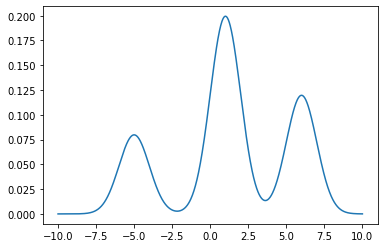

0.049949542495612655 0.0028679926199426113 0.053553642452615784


In [19]:
mu1, sigma1 = -5, 1
mu2, sigma2 = 1, 1
mu3, sigma3 = 6, 1
mu = [mu1,mu2,mu3]
sigma = [sigma1, sigma2, sigma3]

def GM(X, mu,sigma): 
    return 0.2*norm.pdf(X, mu[0],sigma[0]) + 0.5*norm.pdf(X, mu[1],sigma[1]) + 0.3*norm.pdf(X, mu[2],sigma[2])

N = 1000
X = np.linspace(-10, 10, N)
data = GM(X, mu, sigma) 
#data = 0.2*norm.pdf(X, mu1,sigma1) + 0.5*norm.pdf(X, mu2,sigma2) + 0.3*norm.pdf(X, mu3,sigma3)

plt.plot(X, data) 
plt.show()

print(np.mean(data),np.var(data), np.std(data))


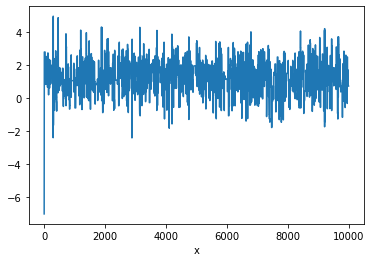

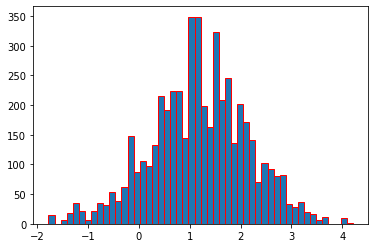

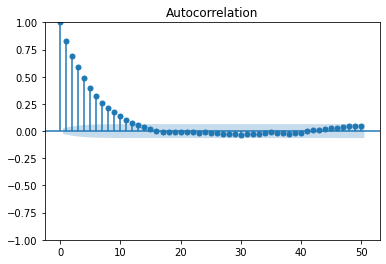

True Mean: 0.049950
Estimated Mean: 1.186445


In [24]:
def sampling(x_old, tune, mu, sigma):

    def logGM(x, mu,sigma): 
        return 0.2*norm.logpdf(x, mu[0],sigma[0]) + 0.5*norm.logpdf(x, mu[1],sigma[1]) + 0.3*norm.logpdf(x, mu[2],sigma[2])

    x_cand = np.random.normal(x_old, tune) # proposal distribution, random.normal(loc=0.0, scale=1.0, size=None)
    accept_ratio = min(0, logGM(x_cand,mu,sigma) - logGM(x_old,mu,sigma)) # 建议分布是对称的，简化
    u = np.random.rand()
    if u==0 or np.log(u) <= accept_ratio:
        return x_cand
    else:
        return x_old

tune = 10 # 调节参数
n_iter = 10000
x = -7
x_draws = []
for i in range(n_iter):
    x = sampling(x, tune, mu, sigma)
    x_draws.append(x)
x_draws = np.array(x_draws)

plt.plot(range(n_iter), x_draws)
plt.xlabel('x')
plt.show()

m_index = int(n_iter/2)
plt.hist(x_draws[m_index:], edgecolor = 'r', bins=50) #bins: 统计的区间分布
plt.show()

plot_acf(x_draws[m_index:],lags=50)
plt.show()

print("True Mean: %f" % np.mean(data))
print("Estimated Mean: %f" % np.mean(x_draws[m_index:]))

### Note
采样效果不好！

## Q2

![Q2](Q2.jpg)

### 生成数据

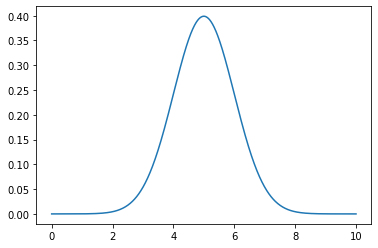

0.09989994420133419
0.1349120856214876


In [37]:
mu = 5
sigmaSq = 1

X = np.linspace(0, 10, 1000)
data = norm.pdf(X, mu, sigmaSq)

plt.plot(X, data)
plt.show()

ybar = np.mean(data)
std = np.std(data)

### 单分量MH算法


$p(\alpha)= N(0,5)$, 则$\sigma^{2} = exp(2\alpha)$满足对数正态分布

[scipy lognorm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html )
![lognorm](lognorm.jpg)

In [38]:
from scipy.stats import lognorm

eta, tauSq = 0, 100
s, omegaSq = 0, 5

def p_y(x, mu, sigmaSq, log = True):
    if log == True:
        return norm.logpdf(x, mu, sigmaSq)
    else:
        return norm.pdf(x, mu, sigmaSq)

def p_mu(x, eta, tauSq, log = True):
    if log == True:
        return norm.logpdf(x, eta, tauSq)
    else:
        return norm.pdf(x, eta, tauSq)

def p_SigmaSq(x, s, omegaSq, log = True):
    if log == True:
        return lognorm.logpdf(x, s=np.sqrt(omegaSq), loc=0, scale=np.exp(s))
    else:
        return lognorm.pdf(x, s=np.sqrt(omegaSq), loc=0, scale=np.exp(s))

In [56]:
def sampling(x_old, tune, eta, tauSq, s, omegaSq):
    x = np.zeros(2)
    # 更新mu
    k = 0
    x_cand = np.random.normal(x_old[k], tune[k]) # proposal distribution, random.normal(loc=0.0, scale=1.0, size=None)
    accept_ratio = min(0, p_mu(x_cand, eta, tauSq) - p_mu(x_old[k], eta, tauSq))# 建议分布是对称的，简化
    u = np.random.rand()
    if u==0 or np.log(u) <= accept_ratio:
        x[k] = x_cand
    else:
        x[k] = x_old[k]

    # 更新sigma
    k=1
    x_cand = np.random.normal(x_old[k], tune[k]) # proposal distribution, random.normal(loc=0.0, scale=1.0, size=None)
    accept_ratio = min(0, p_SigmaSq(x_cand, s, omegaSq) - p_SigmaSq(x_old[k], s, omegaSq))# 建议分布是对称的，简化
    u = np.random.rand()
    if u==0 or np.log(u) <= accept_ratio:
        x[k] = x_cand
    else:
        x[k] = x_old[k]
    
    return x

tune = [1, 10] # 调节参数
n_iter = 1000
x = [0, 1] # x = [mu,sigmaSq]
X_draws = []
for i in range(n_iter):
    x = sampling(x, tune, eta, tauSq, s, omegaSq)
    X_draws.append(x)
X_draws = np.array(X_draws)
#print(X_draws)


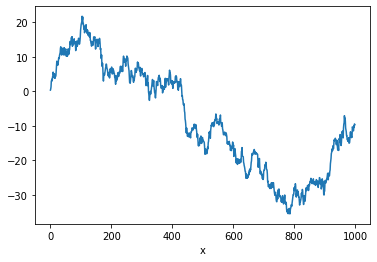

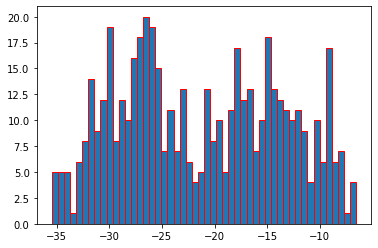

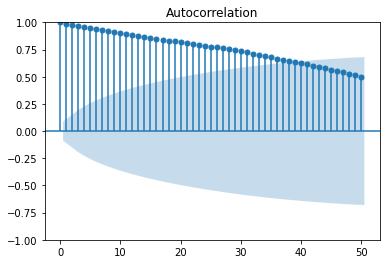

True Mean: 5.000000
Estimated Mean: -21.285765


In [57]:
# mu
x_draws = X_draws[:,0]
plt.plot(range(n_iter), x_draws)
plt.xlabel('x')
plt.show()

m_index = int(n_iter/2)
plt.hist(x_draws[m_index:], edgecolor = 'r', bins=50) #bins: 统计的区间分布
plt.show()

plot_acf(x_draws[m_index:],lags=50)
plt.show()

print("True Mean: %f" % mu)
print("Estimated Mean: %f" % np.mean(x_draws[m_index:]))

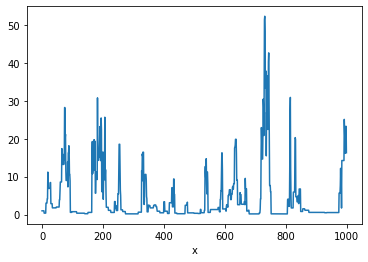

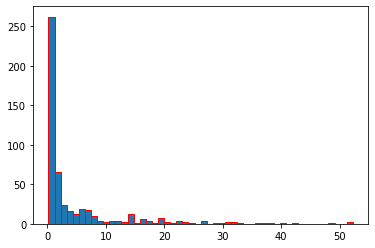

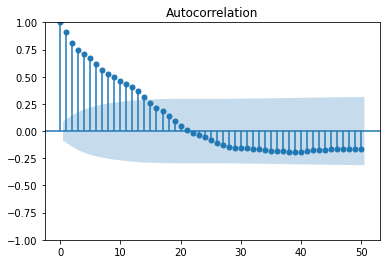

True Var: 1.000000
Estimated Var: 4.519585


In [58]:
# sigma

x_draws = X_draws[:,1]
plt.plot(range(n_iter), x_draws)
plt.xlabel('x')
plt.show()

m_index = int(n_iter/2)
plt.hist(x_draws[m_index:], edgecolor = 'r', bins=50) #bins: 统计的区间分布
plt.show()

plot_acf(x_draws[m_index:],lags=50)
plt.show()

print("True Var: %f" % sigma)
print("Estimated Var: %f" % np.mean(x_draws[m_index:]))

### Note

结果离谱！ 单分量MH算法的迭代公式？

## Q3

![Q3_1](Q3_1.jpg)
![Q3_2](Q3_2.jpg)

### 数据生成

In [204]:
D = 20
N = 5000
X = np.zeros((D,N))
y = np.zeros((N,1))
beta = np.zeros(D)
for i in range(D):
    X[i] = np.random.uniform(0,1,N)
beta = np.random.uniform(-1,1,D)
e = np.random.normal(loc=0, scale=1.0,size=N)
y = beta.T @ X + e

### Gibbs sampling

In [205]:
def p_beta(muBeta, sigmaBeta, sigmaSq, X, y):
    precision = np.linalg.inv(sigmaBeta) + 1.0 / sigmaSq * X @ X.T
    vmu = np.linalg.inv(precision)
    #print(np.shape(vmu),vmu)
    mumean = vmu @ (np.linalg.inv(sigmaBeta) @ muBeta + X @ y * (1.0 / sigmaSq))
    #print(np.shape(mumean),mumean)
    return np.random.multivariate_normal(mumean, vmu)
    
def p_SigmaSq(a, b, X, y, beta, n):
    aprime = a + n/2
    bprime = np.sum((y - beta.T @ X)**2) / 2.0 + b
    return 1.0/np.random.gamma(aprime, bprime)

In [211]:
#Starting values
sigmaSq = 1.0; 
beta = np.zeros(D)
niter = 10000
#Priors
muBeta= np.zeros(D)
sigmaBeta = np.identity(D)
a, b = 3, 1
#Draws
betaDraws = []
sigmaSqDraws = []
for iter in range(niter):
    beta = p_beta(muBeta, sigmaBeta, sigmaSq, X, y)
    sigmaSq = p_SigmaSq(a, b, X, y, beta, N)
    betaDraws.append(beta)
    sigmaSqDraws.append(sigmaSq)
    

In [212]:
print(np.shape(betaDraws), np.shape(sigmaSqDraws))
print(np.var(y), np.mean(sigmaSqDraws))

(10000, 20) (10000,)
1.5382305704292611 1.656228379194083e-07


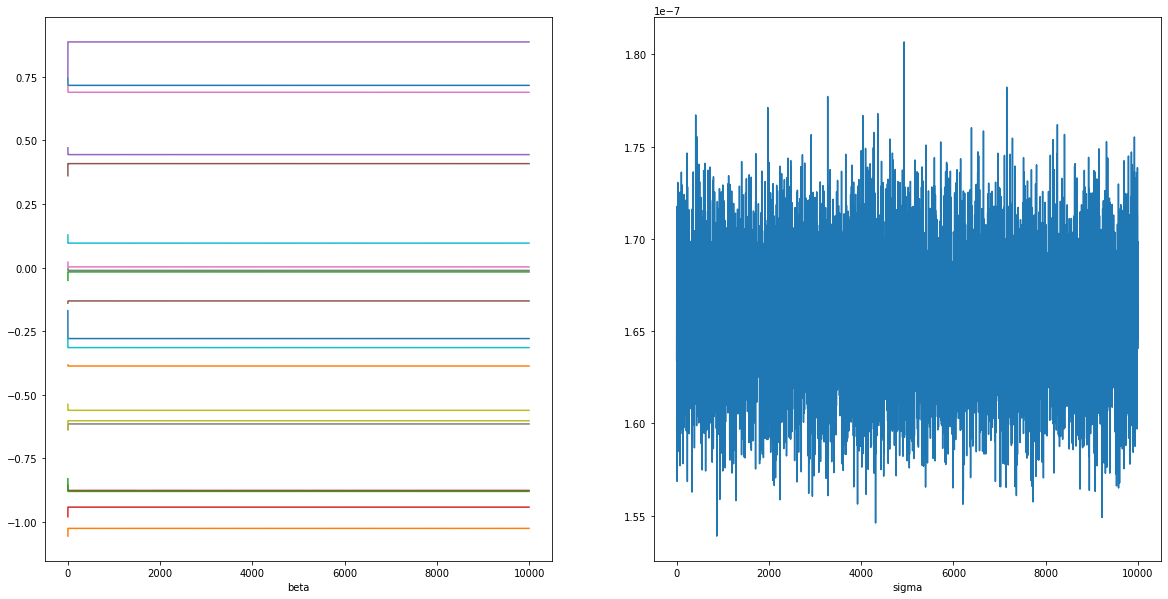

In [210]:
plt.subplots(figsize=(20, 10)) 
plt.subplot(1,2,1)
plt.plot(range(niter),np.array(betaDraws))
plt.xlabel('beta')
plt.subplot(1,2,2)
plt.plot(range(niter),np.array(sigmaSqDraws))
plt.xlabel('sigma')
plt.show()

## Q4

![Q4](Q4.jpg)
![Q4](Q4_2.jpg)

### 数据生成

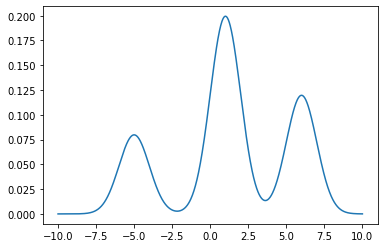

0.049949542495612655 0.0028679926199426113 0.053553642452615784


In [214]:
mu1, sigma1 = -5, 1
mu2, sigma2 = 1, 1
mu3, sigma3 = 6, 1
mu = [mu1,mu2,mu3]
sigma = [sigma1, sigma2, sigma3]

def GM(X, mu,sigma): 
    return 0.2*norm.pdf(X, mu[0],sigma[0]) + 0.5*norm.pdf(X, mu[1],sigma[1]) + 0.3*norm.pdf(X, mu[2],sigma[2])

N = 1000
X = np.linspace(-10, 10, N)
D = GM(X, mu, sigma) 
#data = 0.2*norm.pdf(X, mu1,sigma1) + 0.5*norm.pdf(X, mu2,sigma2) + 0.3*norm.pdf(X, mu3,sigma3)

plt.plot(X, D) 
plt.show()

print(np.mean(D),np.var(D), np.std(D))

### 推导参数的满条件分布

In [217]:
# 超参数
K = 3
alpha = np.ones(N)/K
eta = 0
tauSq = 100
a, b = 3, 1